Notes:

Detector deadtime (Ge reflection vs attenuator) for 11.1 keV, threshold = 11, 5-18 keV (med) gain.

Count time 0.01 sec (SiGe data 0.1 sec)

Same settings as SiGe data

Analysis of deadtime shows (per pixel):

< 0.5M cps - linear

<1.2M cps - fits normal quadratic

1.2M-8M cps - looks like some deattime correction applied. Slightly odd shape but working

.>8M cps - saturation


In [1]:
import sys
sys.path.append('/dls_sw/i16/software/python')
from dlstools.pdnx import *
from matplotlib.pyplot import *
%matplotlib notebook 
p='/dls/i16/data/2019/mt18003-4/%i.nxs'

=== Importing dlstools package


/dls_sw/i16/software/python/dlstools/pdnx.py:73: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)


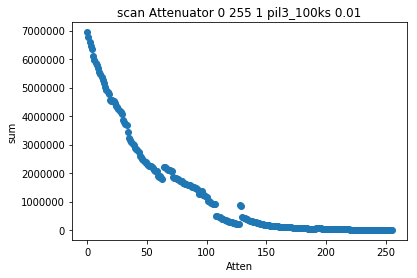

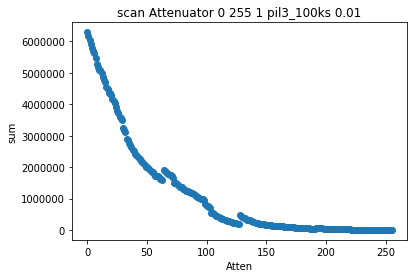

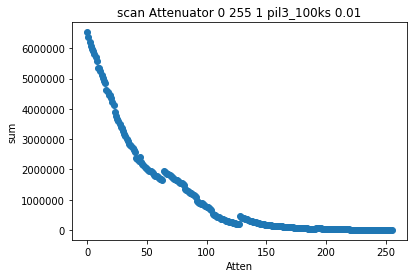

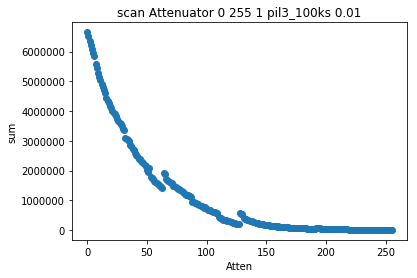

[None, None, None, None]

In [2]:
[pdnx(p % i).nx.plot() for i in [778410, 778412, 778413, 778414]]

[None, None, None, None]

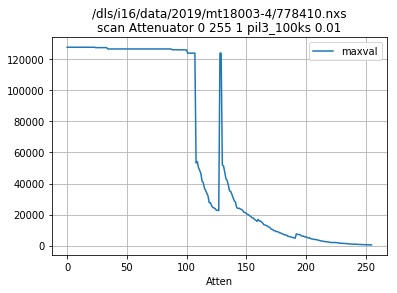

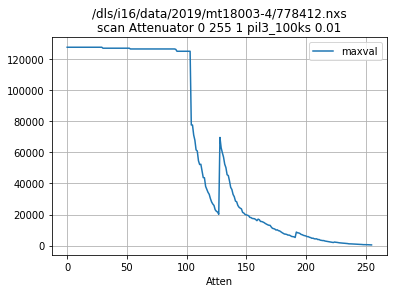

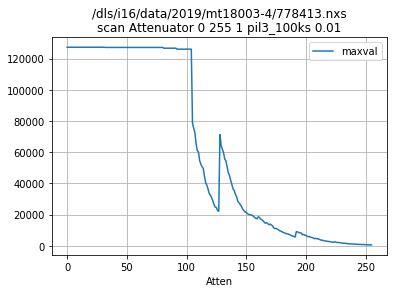

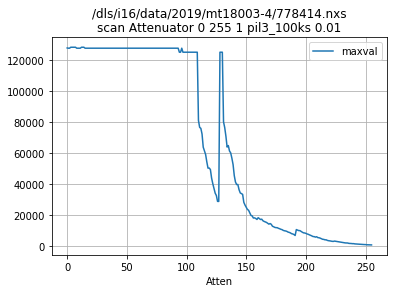

In [3]:
[pdnx(p % i).plt('Atten', 'maxval') for i in [778410, 778412, 778413, 778414]]

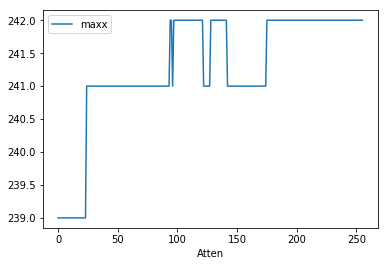

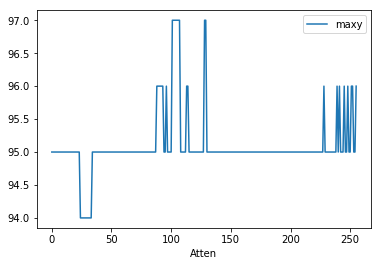

In [4]:
n = pdnx(p % 778410)
n.plot('Atten','maxx')
n.plot('Atten','maxy')
#maxx, maxy = 242, 95 #highish attenuation #numpy indexing same except transposed (peak is 95, 242)

In [5]:
n

,Atten,TimeFromEpoch,TimeSec,Transmission,count_time,delta_axis_offset,ic1monitor,kap,kdelta,kgam,kmu,kphi,kth,maxval,maxx,maxy,path,rc,sum
0,0.0,1.557309e+09,514027.106304,1.000000,0.01,8.8,164.666931,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,127844.0,239.0,95.0,1.0,300.487427,6943744.0
1,1.0,1.557309e+09,514033.253458,0.952366,0.01,8.8,164.622969,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,127844.0,239.0,95.0,2.0,300.446411,6779509.0
2,2.0,1.557309e+09,514039.221530,0.907001,0.01,8.8,164.564355,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,127844.0,239.0,95.0,3.0,300.406219,6609973.0
3,3.0,1.557309e+09,514044.316544,0.863797,0.01,8.8,164.487117,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,127844.0,239.0,95.0,4.0,300.375732,6477273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,252.0,1.557310e+09,515324.907364,0.000075,0.01,8.8,164.437965,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,486.0,242.0,96.0,253.0,299.290710,4219.0
253,253.0,1.557310e+09,515330.087337,0.000072,0.01,8.8,164.423922,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,452.0,242.0,95.0,254.0,299.255066,3822.0
254,254.0,1.557310e+09,515335.453480,0.000068,0.01,8.8,164.387288,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,451.0,242.0,95.0,255.0,299.215576,3882.0
255,255.0,1.557310e+09,515340.815897,0.000065,0.01,8.8,164.373855,-132.40352,46.605127,0.0,0.0,145.546025,79.356025,413.0,242.0,96.0,256.0,299.177368,3612.0


In [6]:
import sys
sys.path.append('/dls_sw/i16/software/python')
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
from dlstools.pdnx import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
%matplotlib notebook 
datadir='/dls/i16/data/2019/mt18003-4/'

from dlstools import dataloader
from dlstools.dataloader import vec2mat
d=dataloader.dlsloader(datadir+'%i.dat')
pil=dataloader.tiffloader(d, lambda obj: datadir+obj.pilatus3_100k_path_template)

def peak_index(np_array):
    idx = np.where(np_array == np.amax(np_array))
    return (idx[0][0], idx[1][0])



=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


<IPython.core.display.Javascript object>


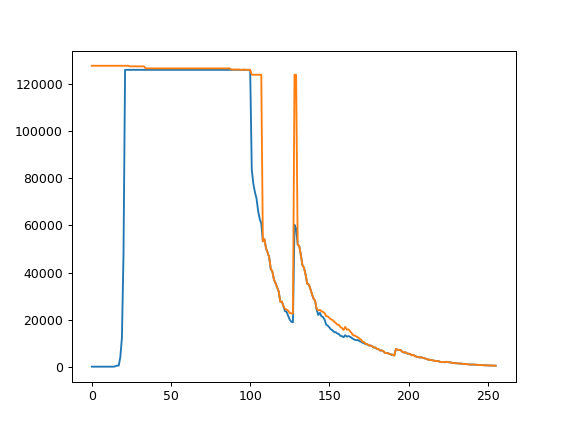

<IPython.core.display.Javascript object>


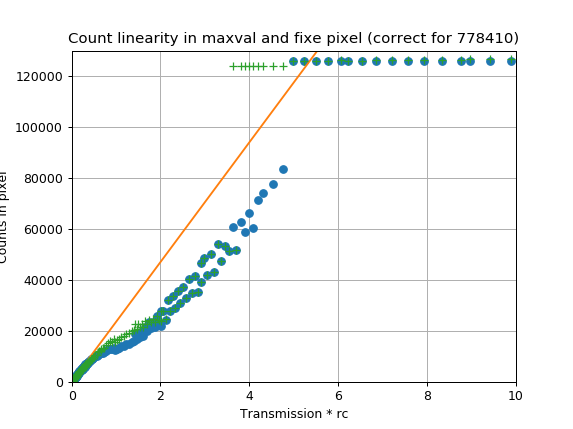

<IPython.core.display.Javascript object>


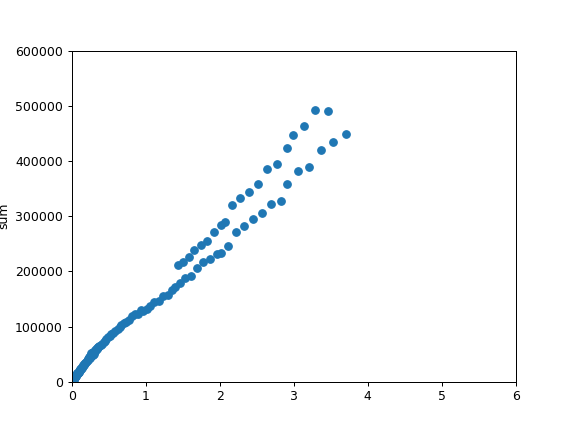

(0, 600000)

In [7]:
d(778410)
pixval = []
for idx in d.path:
    pixval += [pil(idx).image_01[95, 242]] #fixed pixel value for 778410
pixval = np.array(pixval)
figure(); plot(d.Atten, pixval)
plot(d.Atten, d.maxval)
figure()
plot(d.Transmission*d.rc, pixval,'o'); xlabel('Transmission * rc'); ylabel('Counts in pixel'); xlim([0,10]); ylim([0,130000]); grid(1)
i=256-20; m=pixval[i]/d.Transmission[i]/d.rc[i]
plot(d.Transmission*d.rc, d.Transmission*d.rc*m)

plot(d.Transmission*d.rc, d.maxval,'+');
title('Count linearity in maxval and fixe pixel (correct for 778410)')
figure(); plot(d.Transmission*d.rc, d.sum,'o'); ylabel('sum'); xlim([0,6]); ylim([0,600000])



In [8]:
import sys
sys.path
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
%matplotlib nbagg
from matplotlib.pyplot import *
from numpy import *
from dlstools.quickfit import *
from dlstools.dirty_fit import fit


<IPython.core.display.Javascript object>


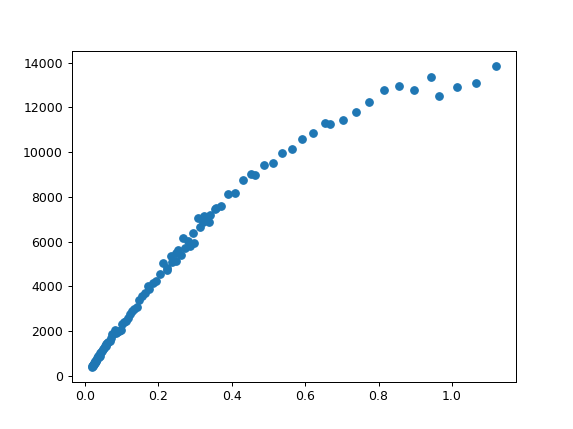

In [11]:
#data for fitting - low countrate
#low transmission points are last ones
n=100
x=d.Transmission[256-n:]*d.rc[256-n:]
y=pixval[256-n:]
figure(); plot(x,y,'o'); #data to fit

Function name: poly2
        p1:            24601 +/- 129       
        p2:           -11368 +/- 164       



<IPython.core.display.Javascript object>


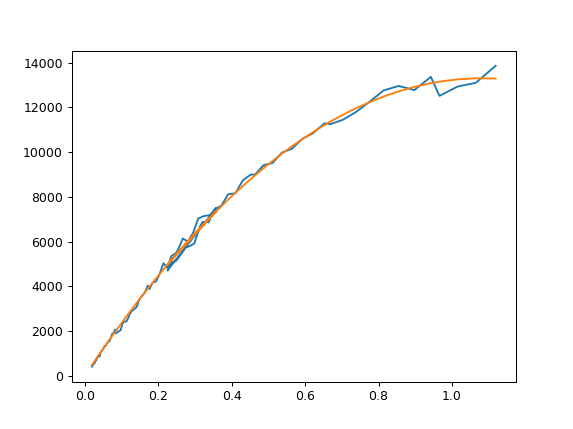

In [12]:
poly2=fit_func('poly2',['p1','p2'],                   
                'x*p1 +x*x*p2')

print poly2.fit(x,y,pin=[1,1,1])

figure()
plot(x,y)
plot(x, poly2(x))

<IPython.core.display.Javascript object>


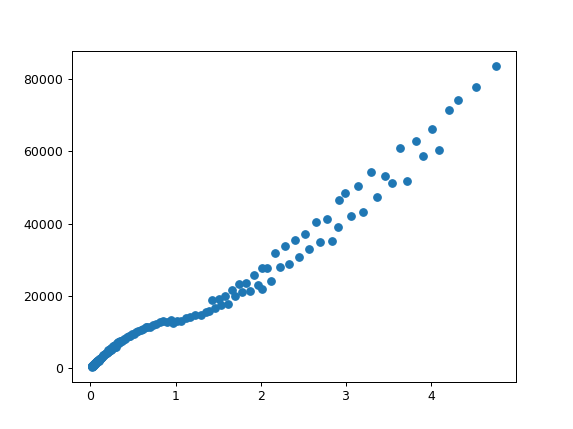

In [13]:
#data for fitting - high countrate
#low transmission points are last ones
n=155
x=d.Transmission[256-n:]*d.rc[256-n:]
y=pixval[256-n:]
figure(); plot(x,y,'o'); #data to fit

In [ ]:
poly2_plus_line=fit_func('highrate',['p1','p2','x0', 'c'],                   
                'x*p1 +x*x*p2 + (x>x0)*(x-x0)*c')

print poly2_plus_line.fit(x,y,pin=[24601,-11368,1,0])

figure()
plot(x,y,'o')
plot(x, poly2_plus_line(x),'.')

Function name: two_poly2
        p1:            25010 +/- 1136      
        p2:           -12153 +/- 1251      
        x0:           1.1000 +/- 0.0000    
        q1:            12654 +/- 771       
        q2:             1792 +/- 231       



/dls_sw/i16/software/python/dlstools/quickfit.py:94: RuntimeWarning: divide by zero encountered in log10
  _n_dec_places = max(0, int(-np.round(np.log10(self.params[name].stderr))) + 1)


<IPython.core.display.Javascript object>


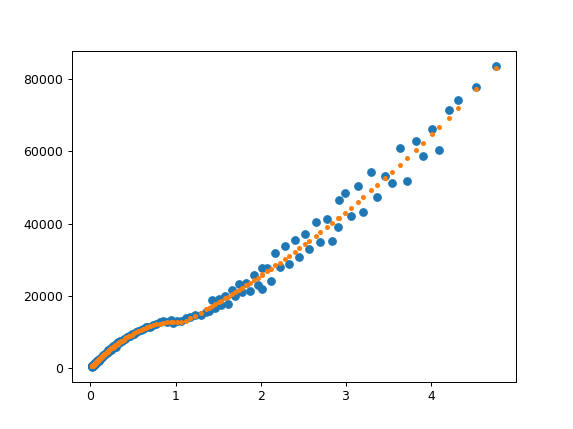

In [14]:
two_poly2=fit_func('two_poly2',['p1','p2', 'x0', 'q1', 'q2'],                   
                '(x<x0)*(x*p1 +x*x*p2) + (x>=x0)* ((x0*p1 +x0*x0*p2) + (x-x0)*q1 + (x-x0)*(x-x0) * q2)')


two_poly2.params['x0'].vary=False

print two_poly2.fit(x,y,pin=[24601,-11368,1.1,0,0])

figure()
plot(x,y,'o')
plot(x, two_poly2(x),'.')

In [ ]:
#need inverse function for deadtime correction - may be harder!
#real data has peak pixel rates up to 3.5M cps


<IPython.core.display.Javascript object>


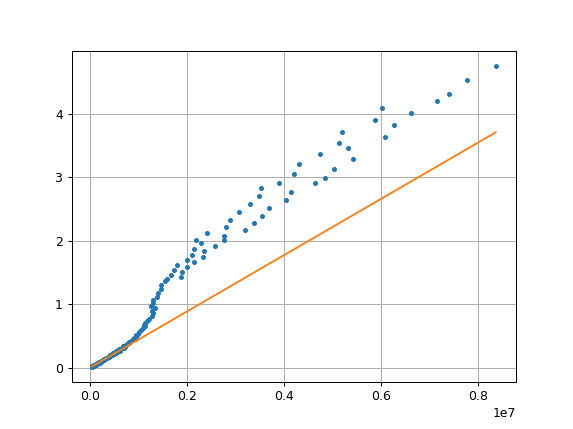

85200.0


<IPython.core.display.Javascript object>


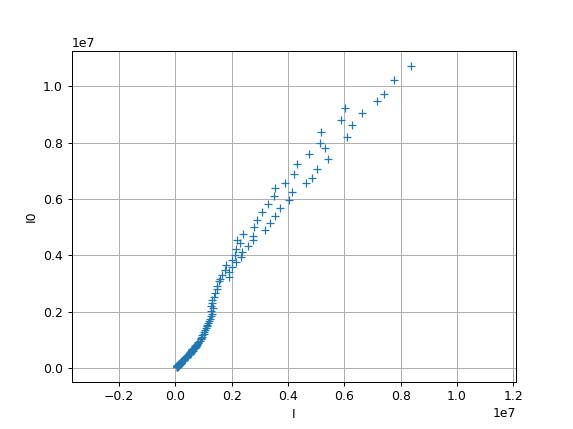

In [15]:

#data for fitting - high countrate
#low transmission points are last ones
n=155
y=d.Transmission[256-n:]*d.rc[256-n:] #scaled output rate
x=pixval[256-n:]/.01 #input count-rate cps


figure()
i=15
plot(x,y,'.')
m=y[155-i]/x[155-i]
print x[155-i]
plot(x, m*x); grid(1)

I=x
I0=y/m
figure()
plot(I, I0, '+'); xlabel('I'); ylabel('I0'); axis('equal'); grid(1)


In [ ]:
two_poly2=fit_func('two_poly2',['p1','p2', 'x0', 'q1', 'q2'],                   
                '(x<x0)*(x*p1 +x*x*p2) + (x>=x0)* ((x0*p1 +x0*x0*p2) + (x-x0)*q1 + (x-x0)*(x-x0) * q2)')


two_poly2.params['x0'].vary=False

print two_poly2.fit(I,I0,pin=[1,0,1.3e6,0,0])

figure()
plot(I,I0,'o')
plot(I, two_poly2(I),'.'); 
axis('equal'); grid(1)

In [16]:
# need to improve fit, esp low rate

Function name: two_poly3
        p1:             1.46 +/- 0.24      
        p2:       -0.0000016 +/- 0.0000005 
        p3:  0.00000000000141 +/- 0.00000000000028
        x0:     1400000.0000 +/- 0.0000    
        q1:             1.75 +/- 0.10      
        q2:      -0.00000015 +/- 0.00000004
        q3:  0.000000000000009 +/- 0.000000000000004



<IPython.core.display.Javascript object>


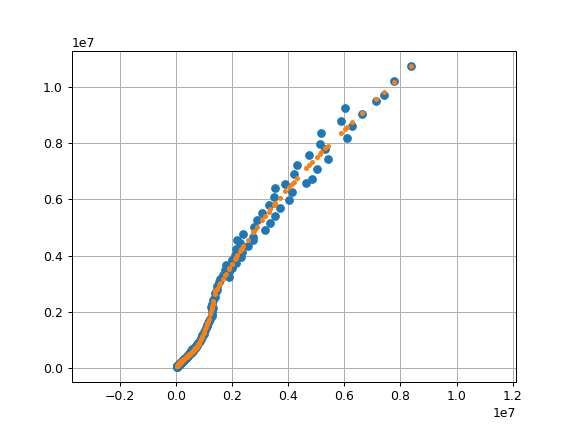

<IPython.core.display.Javascript object>


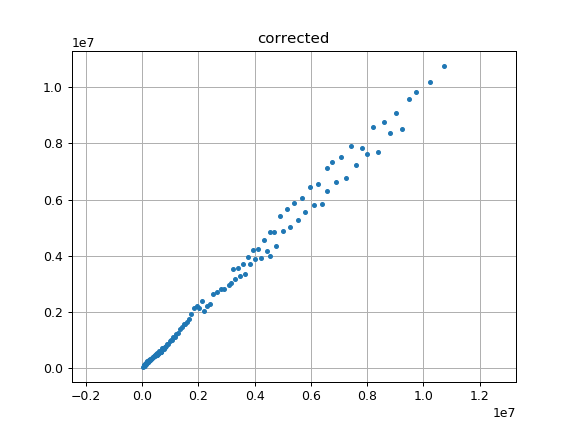

Text(0.5,1,u'corrected')

In [17]:
two_poly3=fit_func('two_poly3',['p1','p2', 'p3', 'x0', 'q1', 'q2', 'q3'],                   
                '(x<x0)*(x*p1 + x**2*p2 + x**3*p3) + (x>=x0)* ((x0*p1 +x0**2*p2+x0**3*p3) + (x-x0)*q1 + (x-x0)**2 * q2 + + (x-x0)**3 * q3)')


two_poly3.params['x0'].vary=False


print two_poly3.fit(I,I0,pin=[1,0, 0,1.4e6,0,0,0])

figure()
plot(I,I0,'o')
plot(I, two_poly3(I),'.'); 
axis('equal'); grid(1)


figure()
plot(I0, two_poly3(I),'.'); 
axis('equal'); grid(1); title('corrected')

<IPython.core.display.Javascript object>


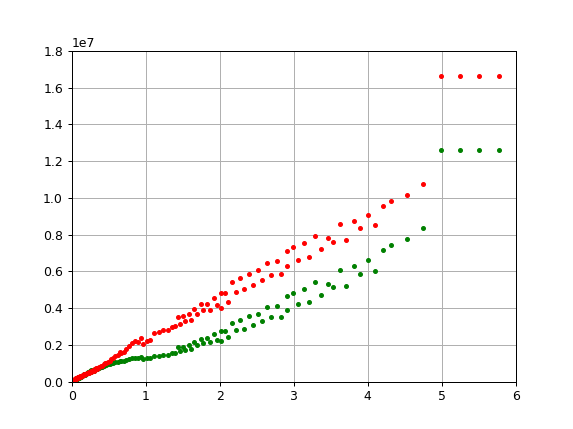

In [30]:
d(778410)
figure()
plot(d.Transmission*d.rc, pixval/0.01,'.g');
plot(d.Transmission*d.rc, two_poly3(pixval/0.01),'.r');

xlim([0,6]); ylim(0,1.8e7); grid(1); 

In [50]:

#deadtime correction. Counts in cps. Parameters from fit to deadtime calibration data
def corrected(x):
    [p1, p2, p3, x0, q1, q2, q3] = [
       1.457047192214227,
       -1.6396060309159249e-06,
       1.4132902753176387e-12,
       1400000.0,
       1.753447433492027,
       -1.5181323796095546e-07,
       9.484579611828304e-15]
    return (x<x0)*(x*p1 + x**2*p2 + x**3*p3) + (x>=x0)* ((x0*p1 +x0**2*p2+x0**3*p3) + (x-x0)*q1 + (x-x0)**2 * q2 + + (x-x0)**3 * q3)



<IPython.core.display.Javascript object>


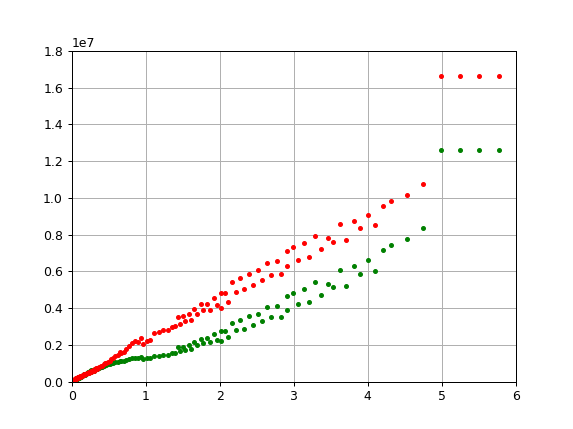

In [51]:
d(778410)
figure()
plot(d.Transmission*d.rc, pixval/0.01,'.g');
plot(d.Transmission*d.rc, corrected(pixval/0.01),'.r');

xlim([0,6]); ylim(0,1.8e7); grid(1); 

In [61]:
print sum(pil(10).image_01)
print sum(corrected(pil(10).image_01))

5673396
8303059.761565905


<IPython.core.display.Javascript object>


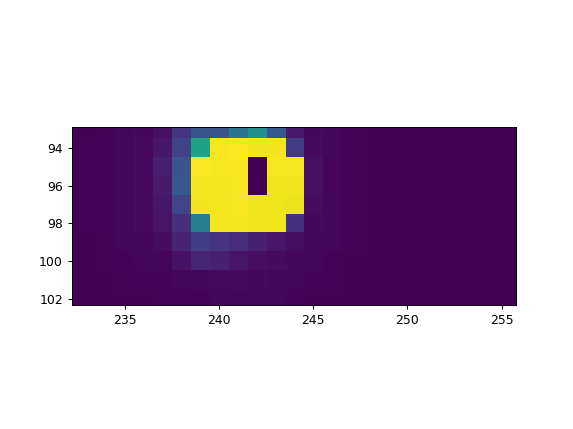

In [59]:
figure(); imshow(corrected(pil(10).image_01))